In [1]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters, StatsBase

include("../utils/import.jl")
using .Import
using ..Import: State

include("../utils/figs.jl")
using .Figs

# Experiments

## Conditions

**Active Teacher Selection (ATS):** Solve using an approximate POMDP solver (POMCPOW).

**Random:** Select actions randomly. 

**Passive Teacher Selection:** Decide when to select an arm and when to query a teacher using an approximate POMDP solver, but select teacher to query randomly.

# Plots
## Set Parameters
### Experiment Names

In [2]:
# ATS
pomdp_expIDs = ["22128_"*x for x in ["051526", "055025", "06251", "07242", "075856", "083337", "09080", "100546", "10400", "113044", "120617", "130613", "13588", "143446", "15378", "161233", "164944", "174134", "184340", "192058"]]

# Random
random_expIDs1 = ["base_rand_act_22127_"*x for x in ["195414", "210743", "212754", "220210", "222350", "225925", "232037", "234123"]]
random_expIDs2 = ["base_rand_act_22128_"*x for x in ["002527", "00453", "010439", "013758", "015719", "021655", "02377", "030644", "033715", "035652", "042637", "044617"]]
random_expIDs = cat(random_expIDs1, random_expIDs2, dims=1)

# Passive
passive_expIDs1 = ["base_rand_B_22127_"*x for x in ["195418", "210747", "212758", "220214", "222355", "225929", "232041", "234127"]]
passive_expIDs2 = ["base_rand_B_22128_"*x for x in ["002530", "00457", "010443", "01382", "015722", "021659", "023711", "030648", "033718", "035655", "042641", "044621"]]
passive_expIDs = cat(passive_expIDs1, passive_expIDs2, dims=1)
;

### Experiment Parameters

In [3]:
runs = 25
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
pomdp_name, random_name, passive_name = "ATS", "Random", "Passive";

### Plotting Parameters

In [4]:
window = 100
labels = [pomdp_name random_name passive_name];

## Import Data

In [5]:
s_p, t_p, a_p, r_p = Import.import_IDs(pomdp_expIDs, runs)
s_r, t_r, a_r, r_r = Import.import_IDs(random_expIDs, runs)
s_pa, t_pa, a_pa, r_pa = Import.import_IDs(passive_expIDs, runs)
;

## Analysis
### General

In [6]:
function print_state(s::State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

print_state (generic function with 1 method)

In [7]:
# all runs under a given expID have the same start state & optimal action
println("** "*pomdp_name*" condition **")
for i in 1:length(pomdp_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_p[i])

    println("State "*string(i)*":")
    print_state(s_r[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*" (R="*string(highest_R)*")\n")
end
println("** "*random_name*" condition **")
for i in 1:length(random_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_r[i])
    
    println("State "*string(i)*":")
    print_state(s_r[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*" (R="*string(highest_R)*")\n")
end
println("** "*passive_name*" condition **")
for i in 1:length(passive_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_pa[i])
    
    println("State "*string(i)*":")
    print_state(s_pa[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*" (R="*string(highest_R)*")\n")
end

** ATS condition **
State 1:
	 u: [5.0, 0.0, 0.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 2.5)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
Highest-Reward Arm:	C1 (R=2.5)

State 2:
	 u: [5.0, 0.0, 5.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 5.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 2.5)
	 d1: [0.0, 0.5, 0.5]	 (exp val 2.5)
Highest-Reward Arm:	C1 (R=5.0)

State 3:
	 u: [5.0, 0.0, 10.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 7.5)
	 d1: [0.0, 0.5, 0.5]	 (exp val 5.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 5.0)
Highest-Reward Arm:	C1 (R=7.5)

State 4:
	 u: [10.0, 0.0, 0.0]
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
Highest-Reward Arm:	C1 (R=5.0)

State 5:
	 u: [5.0, 5.0, 10.0]
	 d1: [0.0, 0.5, 0.5]	 (exp val 7.5)
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
Highest-Reward Arm:	C1 (R=7.5)

State 6:
	 u: [5.0, 10.0, 10.0]
	 d1: [0.0, 0.5, 0.5]	 (exp val 10.0)
	 d1: [0.5, 0.5, 0.0]	 (exp val 7.5)
	 d1:

	 u: [0.0, 10.0, 10.0]
	 d1: [0.0, 0.5, 0.5]	 (exp val 10.0)
	 d1: [0.5, 0.0, 0.5]	 (exp val 5.0)
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
Highest-Reward Arm:	C1 (R=10.0)



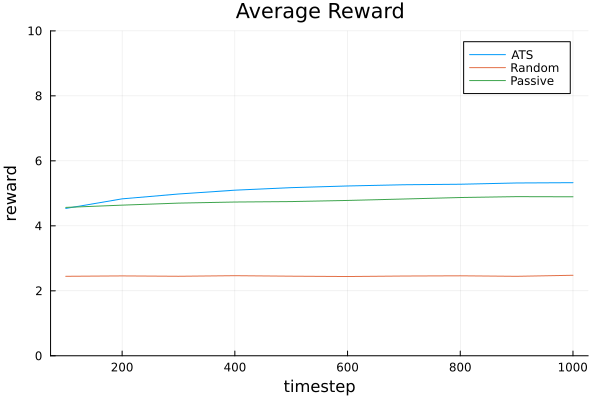

In [8]:
Figs.plot_avg_r_multiple_experiments([r_p, r_r, r_pa], window, labels, "Average Reward")

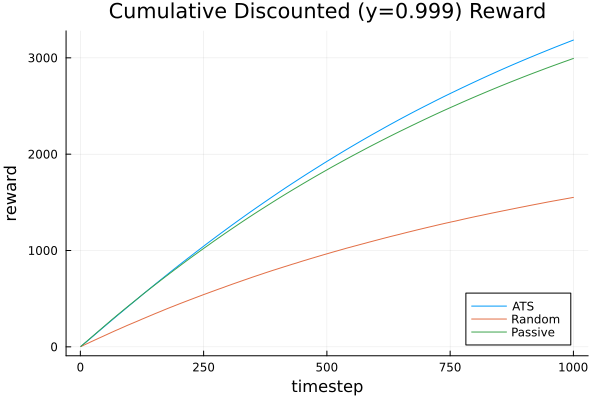

In [9]:
y = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments([r_p, r_r, r_pa], y, labels, "Cumulative Discounted (y="*string(y)*") Reward")

## Action Distributions

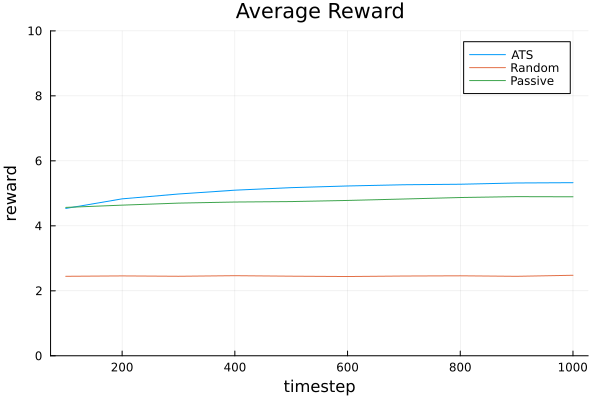

In [10]:
Figs.plot_avg_r_multiple_experiments([r_p, r_r, r_pa], window, labels, "Average Reward")

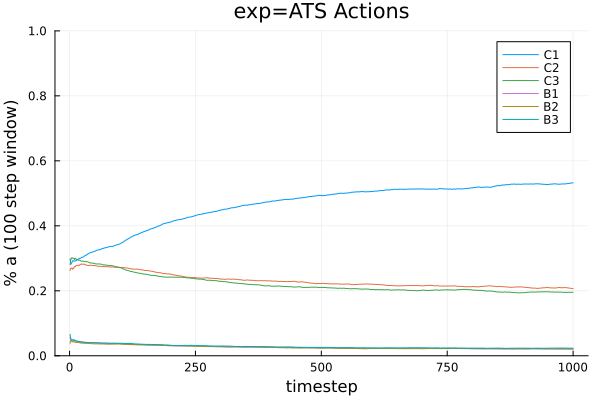

In [11]:
Figs.plot_proportion_actions_all(a_p, actions, window, "exp="*pomdp_name*" Actions")

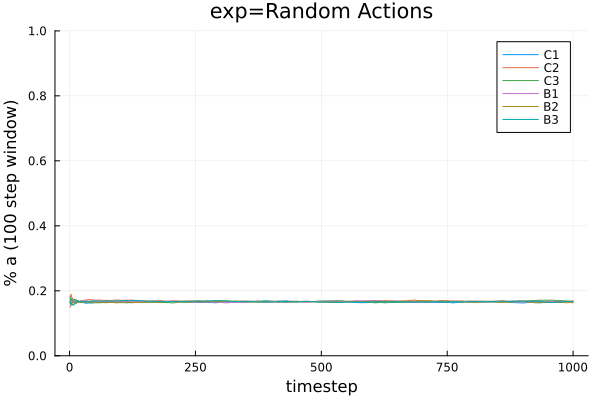

In [12]:
Figs.plot_proportion_actions_all(a_r, actions, window, "exp="*random_name*" Actions")

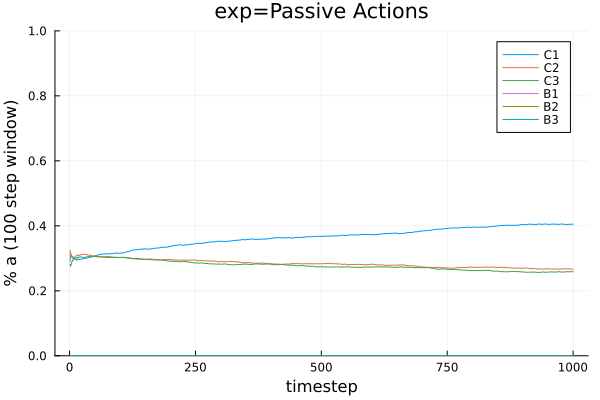

In [13]:
Figs.plot_proportion_actions_all(a_pa, actions, window, "exp="*passive_name*" Actions")